In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math 
import copy 
import sys
from tkinter import *
from tkinter import ttk
from PIL import Image, ImageTk

%matplotlib inline 

In [2]:
df_train = pd.read_csv('KDDTrain+aggregate.csv')
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classification.
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df_train.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_loginsì', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_serror_rate', ' rerror_rate', ' srv_rerror_rate',
       ' same_srv_rate', ' diff_srv_rate', ' srv_diff_host_rate',
       ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       '  dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', ' classification.'],
      dtype='object')

In [4]:
df_test = pd.read_csv('KDDTest+aggregate.csv')
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classification.
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Probe


In [5]:
df_test.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_loginsì', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_serror_rate', ' rerror_rate', ' srv_rerror_rate',
       ' same_srv_rate', ' diff_srv_rate', ' srv_diff_host_rate',
       ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       '  dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', ' classification.'],
      dtype='object')

In [6]:
df_train.rename(columns = lambda x: x.strip().lower().replace(".", ""), inplace = True)
df_test.rename(columns = lambda x: x.strip().lower().replace(".", ""), inplace = True)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_loginsì           125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_loginsì           22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [9]:
df_train.nunique() 

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_loginsì                6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [10]:
df_test.nunique() 

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_loginsì                5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [11]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_train.classification.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: classification, dtype: int64

In [14]:
df_test.classification.value_counts()

normal    9711
Dos       7458
R2L       2754
Probe     2421
U2R        200
Name: classification, dtype: int64

In [15]:
# Check duplicated data
df_train.duplicated().sum()

9

In [16]:
# Drop duplicated data
df_train.drop_duplicates(inplace = True)

# Check for any duplicated values
df_train.duplicated().sum().any()

False

In [17]:
# Check duplicated data
df_test.duplicated().sum()

3

In [18]:
# Drop duplicated data
df_test.drop_duplicates(inplace = True)

# Check for any duplicated values
df_test.duplicated().sum().any()

False

In [19]:
# print number of NaN Values
df_train.isnull().sum().sum().any()

False

In [20]:
# print number of NaN Values
df_test.isnull().sum().sum().any()

False

In [21]:
df_train.to_csv('Clean_KDDTrain.csv', index = False)
df_test.to_csv('Clean_KDDTest.csv', index = False)

In [45]:
df_test.iloc[0,:]

duration                             0
protocol_type                      tcp
service                        private
flag                               REJ
src_bytes                            0
dst_bytes                            0
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_loginsì                   0
logged_in                            0
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                              229
srv_count                           10
serror_rate                        0.0
srv_serror_rate          

In [29]:
# independant and dependant variables
X_train = df_train.iloc[:,:-1].values # independent variables
y_train = df_train.iloc[:,-1].values # dependent variable

In [25]:
# independant and dependant variables
X_test = df_test.iloc[:,:-1].values # independent variables
y_test = df_test.iloc[:,-1].values # dependent variable

In [46]:
X_test[0,:]

array([0, 1, 45, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       229, 10, 0.0, 0.0, 1.0, 1.0, 0.04, 0.06, 0.0, 255, 10, 0.04, 0.06,
       0.0, 0.0, 0.0, 0.0, 1.0, 1.0], dtype=object)

In [30]:
print(X_train.shape)

(125964, 41)


In [31]:
print(X_test.shape)

(22541, 41)


In [32]:
# y_train[y_train != 'normal'] = 'anomaly'

In [33]:
# Check whether the dataset is equally splitted or not
from collections import Counter
print(y_train) 
print(Counter(y_train))

['normal' 'normal' 'Dos' ... 'normal' 'Dos' 'normal']
Counter({'normal': 67343, 'Dos': 45927, 'Probe': 11647, 'R2L': 995, 'U2R': 52})


In [34]:
#y_test[y_test != 'normal'] = 'anomaly'

In [35]:
print(y_test) 
print(Counter(y_test))

['Dos' 'Dos' 'normal' ... 'Dos' 'normal' 'Probe']
Counter({'normal': 9711, 'Dos': 7458, 'R2L': 2754, 'Probe': 2418, 'U2R': 200})


In [36]:
# # Encoding indepedant variables
# from sklearn.preprocessing import LabelEncoder
# le_y = LabelEncoder() # LabelEncoder for 1-d array

In [37]:
# y_train = le_y.fit_transform(y_train) # does the same what fit() and transform do in one step
# print(y_train)

In [38]:
# y_test = le_y.fit_transform(y_test) # does the same what fit() and transform do in one step
# print(y_test)

In [39]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
X_le = LabelEncoder()
X_train[:,1] = X_le.fit_transform(X_train[:,1])
X_train[:,2] = X_le.fit_transform(X_train[:,2])
X_train[:,3] = X_le.fit_transform(X_train[:,3])

In [40]:
X_test[:,1] = X_le.fit_transform(X_test[:,1])
X_test[:,2] = X_le.fit_transform(X_test[:,2])
X_test[:,3] = X_le.fit_transform(X_test[:,3])

In [41]:
print(X_train[:,1:4])

[[1 20 9]
 [2 44 9]
 [1 49 5]
 ...
 [1 54 9]
 [1 30 5]
 [1 20 9]]


In [42]:
print(X_test[:,1:4])

[[1 45 1]
 [1 45 1]
 [1 19 9]
 ...
 [1 22 9]
 [2 11 9]
 [1 52 1]]


In [43]:
X_test[0,:]

array([0, 1, 45, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       229, 10, 0.0, 0.0, 1.0, 1.0, 0.04, 0.06, 0.0, 255, 10, 0.04, 0.06,
       0.0, 0.0, 0.0, 0.0, 1.0, 1.0], dtype=object)

In [37]:
# Scaling for making close variables values from each other
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# choose [:, indices] for only scaling numerical data
indices = np.r_[0, 4:41]


X_train[:, indices] = sc_X.fit_transform(X_train[:, indices]) # apply fit() on X_train and transform fit on X_train 
X_test[:, indices] = sc_X.transform(X_test[:, indices]) # because we already fit() on x_train we only transform fit on X_test

In [38]:
# Building SVM classifier
from sklearn.svm import SVC
classifier =  SVC(C = 10, kernel = 'rbf', gamma = 'auto')

In [39]:
classifier.fit(X_train,y_train)

SVC(C=10, gamma='auto')

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
acc_score = accuracy_score(y_test, y_pred)*100
print("Accuracy of Support Vector Machine: {}\n".format(acc_score))
print(classification_report(y_test,y_pred, zero_division = 0))

Accuracy of Support Vector Machine: 77.53870724457656

              precision    recall  f1-score   support

         Dos       0.97      0.84      0.90      7458
       Probe       0.84      0.68      0.75      2418
         R2L       0.94      0.03      0.07      2754
         U2R       0.29      0.01      0.02       200
      normal       0.68      0.98      0.80      9711

    accuracy                           0.78     22541
   macro avg       0.74      0.51      0.51     22541
weighted avg       0.82      0.78      0.73     22541



In [42]:
# np.save('X_train', X_train)
acc_score

77.53870724457656

In [43]:
def stepc(A, Di):
    try:
        c = 1/(1+ math.exp(10*(A*Di-0.5)))
    except Exception as e:
        return 0
    else:
        return c

In [44]:
def stepb(A, Di, r):
    if stepc(A,Di) >= r:
        return 1
    else:
        return 0

In [45]:
def X_d(X, A, Di, rand):
    r = rand.random()
    if (X + stepb(A, Di, r)) >= 1:
        return 1
    else:
        return 0

In [46]:
def cross_over(X_d1, X_d2, X_d3, rand):
    r = rand.random()
    if r < 1/3:
        return X_d1
    elif r >= 1/3 and r < 2/3:
        return X_d2
    else:
        return X_d3

In [47]:
def objective_function(Selected_Features, X_train, y_train, X_test, y_test):
    count = sum(Selected_Features)
    if count == 0:
        return np.NINF
    index = []
    scaling_index = []
    
    for i in range(41):
        if Selected_Features[i] == 1:
            if i not in [1,2,3]:
                scaling_index.append(i)
            index.append(i)
    indices = np.r_[index]
    
    scaling_indices = np.r_[scaling_index ]
    X_train[:,scaling_indices] = scaling_x(X_train[:,scaling_indices])
    X_test[:,scaling_indices] = scaling_x(X_test[:,scaling_indices])
    
    X_train = X_train[:, indices]
    X_test = X_test[:, indices]
    
    global classifier
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)*100 
    fitness = Fitness(acc_score, count, a = 0.6, b = 0.4)
    print(acc_score, fitness)
    return fitness

In [48]:
def Fitness(P, NF, a = 0.6, b = 0.4):
    """P is the classification accuracy/detection rate, NF is the length of the selected feature, where a and b are the parameters
    corresponding to the classification accuracy weight and quality of feature selection, a = [0, 1] and b = 1 − a"""
    try: 
        fitness =  a*P + b*(1/NF)
    except ZeroDivisionError as e:
        return a*P
    else:
        return fitness

In [49]:
class wolf:
    def __init__(self, fitness, dim,seed, lb, ub):
        self.features = [0 for i in range(dim)]
        self.rand = random.Random(seed)
        self.position = [0.0 for i in range(dim)]
        for i in range(dim):
            self.position[i] = ((ub - lb) * self.rand.random() + lb)
        self.fitness = np.NINF


In [50]:
def GWO(fitness, dim, N, max_iter, lb, ub):
    # initialize the grey wolf population
    population = [ wolf(fitness, dim, i, lb, ub) for i in range(N)]
    
    # read and split the data in X_train, y_train, X_test, y_test
    X_train, y_train, X_test, y_test = get_data()
    
    # initialize b, A and C
    rand = random.Random()
    b = 2 - 0 * (2/max_iter)
    A1, A2, A3 = b * (2 * rand.random() - 1), b * (
            2 * rand.random() - 1), b * (2 * rand.random() - 1)
    C1, C2, C3 = 2*rand.random(), 2*rand.random(), 2*rand.random()
    
    # Calculate the fitness of each search agent
    population = sorted(population, key = lambda x : x.fitness, reverse=True)
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])
    
    # while iteration : max_iteration
    iteration = 1
    while iteration < max_iter:
        
        X1 = [0.0 for i in range(dim)]
        X2 = [0.0 for i in range(dim)]
        X3 = [0.0 for i in range(dim)]
        Xnew = [0.0 for i in range(dim)]

        X_d1 = [0 for i in range(dim)]
        X_d2 = [0 for i in range(dim)]
        X_d3 = [0 for i in range(dim)]
        X_dnew = [0 for i in range(dim)]
        
        # for each search agent
        for i in range(N):
            for j in range(dim):
                # Calculate W1, W2, W3
                D_alpha = abs(C1 * alpha_wolf.position[j] - population[i].position[j])
                D_beta = abs(C2 *  beta_wolf.position[j] - population[i].position[j])
                D_gamma = abs(C3 * gamma_wolf.position[j] - population[i].position[j])
                
                # grey wolf optmization
                # Update the position of the current search agent
                X1[j] = alpha_wolf.position[j] - A1 * D_alpha
                X2[j] = beta_wolf.position[j] - A2 * D_beta
                X3[j] = gamma_wolf.position[j] - A3 * D_gamma
                Xnew[j] = (X1[j] + X2[j] + X3[j]) /3.0
                if Xnew[j] < lb:
                    Xnew[j] = lb
                elif Xnew[j] > ub:
                    Xnew[j] = ub
                                
                # binary grey wolf optmization 1, 0
                X_d1[j] = X_d(alpha_wolf.position[j], A1, D_alpha, rand)
                X_d2[j] = X_d(alpha_wolf.position[j], A2, D_beta, rand)
                X_d3[j] = X_d(alpha_wolf.position[j], A3, D_gamma, rand)
                X_dnew[j] = cross_over(X_d1[j], X_d2[j], X_d3[j], rand) # 1 or 0
            
            # Calculate the fitness of all search agent
            NF = sum(X_dnew)
            
            if NF == dim:
                fnew = fitness(77.53870724457656, NF, 0.6, 0.4)
            else:
                print(NF)
                fnew = objective_function(X_dnew, X_train, y_train, X_test, y_test)
                
            if fnew > population[i].fitness:
                population[i].position = Xnew
                population[i].fitness = fnew
                population[i].features = X_dnew
        
        # Update b, A, and C
        b = 2 - iteration * (2/max_iter)
        A1, A2, A3 = b * (2 * rand.random() - 1), b * (
            2 * rand.random() - 1), b * (2 * rand.random() - 1)
        C1, C2, C3 = 2*rand.random(), 2*rand.random(), 2*rand.random()
        
        # Update alpha_wolf, beta_wolf, gamma_wolf
        population = sorted(population, key = lambda x: x.fitness, reverse=True)
        alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])
        print("Iteration = {} best fitness = {} ".format(str(iteration), alpha_wolf.fitness))
        
        # iteration = iteration + 1
        iteration+=1
        
    print("Iteration = {} best fitness = {} ".format(str(iteration), alpha_wolf.fitness))
    return alpha_wolf.features

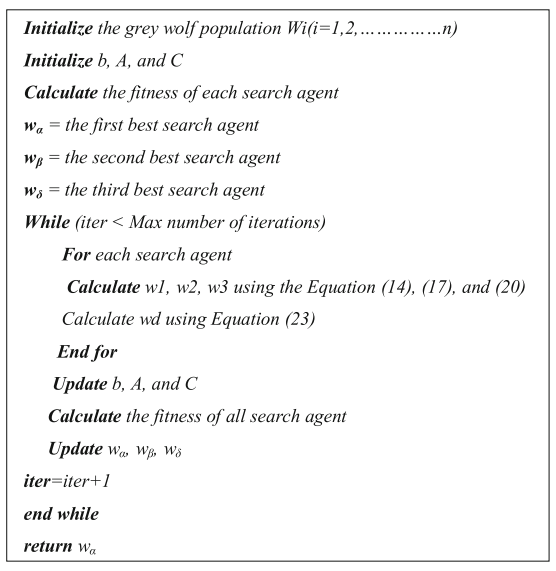

In [51]:
def perf_measure(y_actual, y_pred, value):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==value:
            TP += 1
        if y_pred[i]==value and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]!=value:
            TN += 1
        if y_pred[i]!= value and y_actual[i]!=y_pred[i]:
            FN += 1

    return(TP, FP, TN, FN)

In [52]:
def AAP(AC, run):
    """AC is the accuracy rate"""
    return sum(AC)/run

In [53]:
def ANF(NF, run):
    """NF is the number of features"""
    return sum(NF)/run

In [54]:
def AC(TP, FP, TN, FN):
    return (TP+TN)/(TP+FP+TN+FN)

In [55]:
# Can be used for MBGWO for further work
def DR(TP,FN):
    return TP/(TP+FN)

In [56]:
def scaling_x(X):
    # Scaling for making close variables values from each other
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X = sc_X.fit_transform(X)
    return X

In [57]:
def model_building(X_train, X_test, y_train, FS):
    index = []
    scaling_index = []
    for i in range(41):
        if FS[i] == 1:
            if i not in [1,2,3]:
                scaling_index.append(i)
            index.append(i)
    indices = np.r_[index]
    scaling_indices = np.r_[scaling_index ]
    X_train[:,scaling_indices] = scaling_x(X_train[:,scaling_indices])
    X_test[:,scaling_indices] = scaling_x(X_test[:,scaling_indices])
    Xnew_train = X_train[:, indices]
    Xnew_test = X_test[:, indices]
    classifier.fit(Xnew_train,y_train)
    return classifier, Xnew_train, Xnew_test

In [58]:
def generate(X_train, y_train, X_test, y_test, FS, my_dict):
    classifier, X_train, X_test = model_building(X_train, X_test, y_train,FS)
    y_pred = classifier.predict(X_test)
    clf_report = classification_report(y_test,y_pred, zero_division = 0)
    acc_score = accuracy_score(y_test, y_pred)*100
    print("Accuracy of Support Vector Machine: {}\n".format(acc_score))
    print(classification_report(y_test,y_pred, zero_division = 0))
    values = ['normal', 'Dos', 'Probe', 'U2R', 'R2L']
    for value in values:
        TP, FP, TN, FN = perf_measure(y_train, y_pred, value)
        Ac = AC(TP, FP, TN, FN)
        my_dict[value].append(Ac)
    return my_dict , acc_score, clf_report
    

In [59]:
def get_data():
    df_train = pd.read_csv('Clean_KDDTrain.csv')
    df_test = pd.read_csv('Clean_KDDTest.csv')
    # tain data
    X_train = df_train.iloc[:,:-1].values # independent variables
    y_train = df_train.iloc[:,-1].values # dependent variable
    
    # test data
    X_test = df_test.iloc[:,:-1].values # independent variables
    y_test = df_test.iloc[:,-1].values # dependent variable
    
    # Encoding categorical data
    from sklearn.preprocessing import LabelEncoder
    X_le = LabelEncoder()
    X_train[:,1] = X_le.fit_transform(X_train[:,1])
    X_train[:,2] = X_le.fit_transform(X_train[:,2])
    X_train[:,3] = X_le.fit_transform(X_train[:,3])

    X_test[:,1] = X_le.fit_transform(X_test[:,1])
    X_test[:,2] = X_le.fit_transform(X_test[:,2])
    X_test[:,3] = X_le.fit_transform(X_test[:,3])
    
    return X_train, y_train, X_test, y_test

In [60]:
def test_result():
    global pred_label
    pred_label = Label(frame3, text = "Predicted Attack: Normal")
    pred_label.grid_forget()
    pred_label.grid(row = 5, column = 3)

In [61]:
def create_testframe(features):    
#     global L4
#     L4.grid_forget()
#     L4.grid(row = 0)
    F1, F2, T1, T2 = [],[],[],[]
    for i in range(0,4):
        F1.append(Label(frame3, text = f"Feature {i+1}: "))
        F1[i].grid_forget()
        F1[i].grid(row = i, column = 0)
        F2.append(Label(frame3, text = f"Feature {i+2}: "))
        F2[i].grid_forget()
        F2[i].grid(row = i, column = 4 )
        T1.append(Entry(frame3))
        T1[i].grid_forget()
        T1[i].grid(row = i, column = 2, padx =5, pady=5)
        T2.append(Entry(frame3))
        T2[i].grid_forget()
        T2[i].grid(row = i, column = 5, padx =5, pady=5)
    btn2 = Button(frame3 , text = 'Submit', command = test_result, padx = 20, pady =10)
    btn2.grid_forget()
    btn2.grid(row =4, column=3,padx = 30, pady= 20)
    
    
    

In [62]:
def get_input():
    try: 
        run  =  int(E1.get())
        N = int(E2.get())
        max_iter = int(E3.get())
    except Exception as e:
        print(e)
    else:
        return run, N, max_iter

In [63]:
def clf_table(clf_report):
    my_tree = ttk.Treeview(frame2, show = 'headings')
    my_tree['columns'] = ('name', 'precision', 'recall', 'f1-score', 'support')
    my_tree.pack_forget()
    my_tree.pack()

    my_tree.column('name', width = 80, minwidth = 60)
    my_tree.column('precision', width = 80, minwidth = 60)
    my_tree.column('recall', width = 80, minwidth = 60)
    my_tree.column('f1-score', width = 80, minwidth = 60)
    my_tree.column('support', width = 80, minwidth = 60)

    my_tree.heading('name', text ='Name')
    my_tree.heading('precision', text ='Precision')
    my_tree.heading('recall', text ='Recall')
    my_tree.heading('f1-score', text ='F1-score')
    my_tree.heading('support', text ='Support')   
    
    my_list = clf_report.split()
    for i in range(4,29,5):
        my_tree.insert('','end', values = my_list[i:i+5])
    my_tree.insert('','end', values = ' ')
    my_tree.insert('','end', values = (my_list[29], ' ', ' ',my_list[30],my_list[31]))
    for i in range(32,44,6):
        my_list[i+1] = " ".join(my_list[i:i+2])
        my_tree.insert('','end', values = my_list[i+1:i+6])

In [64]:
# Function of what happens when you press btn1
def btn1Action():
    global L3
    L3.pack_forget()
    L3.pack()
    
    # get data from txtfiled
    dim, lb, ub = 41, 0, 1
    fitness = Fitness
    run, N, max_iter = get_input()
    my_dict = {"normal":[],"Dos":[],"Probe":[], "U2R":[],"R2L":[]}
    fs_list, fs_count, scores = [], [], []
    best_score, best_features, clf_res = 0, [], ''
    for i in range(run):
        FS = GWO(fitness, dim, N, max_iter, lb, ub)
        fs_list.append(FS)
        fs_count.append(sum(FS))
        X_train, y_train, X_test, y_test = get_data()
        my_dict, score, clf_report = generate(X_train, y_train, X_test, y_test, FS, my_dict)
        if score > best_score:
            best_score = score
            best_features = FS
            clf_res = clf_report
        elif Fitness(score, sum(FS)) > Fitness(best_score, sum(best_features)):
            best_score = score
            best_features = FS
            clf_res = clf_report
        scores.append(score)
    
    res0  = Label(frame2, text = f"Best Accuarcy: {best_score}")
    res0.pack_forget()
    res0.pack(pady = 1)
    res1  = Label(frame2, text = f"Best Feature Count: {sum(best_features)}")
    res1.pack_forget()
    res1.pack(pady = 1)
    res2  = Label(frame2, text = f"{best_features}")
    res2.pack_forget()
    res2.pack(pady = 1)
    res3 = Label(frame2, text = f"The average accuracy performance: {AAP(scores,run)}")
    res3.pack_forget()
    res3.pack(pady = 1)
    res4 = Label(frame2, text = f"The average of the subset selected features: {int(ANF(fs_count, run))}")
    res4.pack_forget()
    res4.pack(pady = 1)
    
    clf_table(clf_res)
   
    # create_testframe(best_features)

In [65]:
root = Tk()
root.title('Gray Wolf Optimizer')
root.minsize(755,555)
# root.iconbitmap("path_to_icon")

frame1 = LabelFrame(root, text = "Initialization ", padx= 50, pady=20)
frame1.pack(pady = 10)

L0 = Label(frame1, text = "Intrusion Detection System using GWO")
L0.pack()

nested_frame = LabelFrame(frame1, text = "Input Fields ", padx= 50 , pady = 10)
nested_frame.pack()
###################################
L1 = Label(nested_frame, text = "Enter number of runs: ", anchor = W)
L1.grid(row = 0, column = 0 )

E1 = Entry(nested_frame)
E1.grid(row = 0, column = 1)
E1.insert(0, "1")

L2 = Label(nested_frame, text = "Enter number of population: ", anchor = W)
L2.grid(row = 1, column = 0, pady = 5)

E2 = Entry(nested_frame)
E2.grid(row = 1, column = 1, pady = 5)
E2.insert(0, "12")

L3 = Label(nested_frame, text = "Enter number of iterations: ", anchor = W)
L3.grid(row = 2, column = 0)

E3 = Entry(nested_frame)
E3.grid(row = 2, column = 1)
E3.insert(0, "20")
###################################
btn1 = Button(frame1 , text = 'Generate', command = btn1Action, padx = 10, pady =10)
btn1.pack(pady = 10)

###################################################################
frame2 = LabelFrame(root, text = "Results ", padx = 50,pady = 10)
frame2.pack(pady = 10)
L3 = Label(frame2, text = "HERE IS THE RESULTS")

##################################################################
frame3 = LabelFrame(root, text = "Test The IDS ", padx = 50,pady = 10)
frame3.pack(pady = 10)
# L4 = Label(frame3, text = "The IDS model using GWO-SVM")





# Run The GUI
root.mainloop()

In [66]:
# N = 12
# dim = 41
# max_iter = 20
# lb = 0
# ub = 1
# # fitness = fitness_sphere
# fitness = Fitness
# run = 1
# my_dict = {"normal":[],"Dos":[],"Probe":[], "U2R":[],"R2L":[]}
# fs_list = []
# scores = []
# for i in range(run):
#     FS = GWO(fitness, dim, N, max_iter, lb, ub)
#     print(sum(FS))
#     print(FS)
#     fs_list.append(sum(FS))
#     my_dict, acc_score = generate(X, y_train, x_test, y_test, FS, my_dict)
#     scores.append(acc_score)

## Other Feature Selection Methods
**You can try them by your self and check, it is bonus for you**

In [67]:
# Feature Selection
from sklearn.feature_selection import SelectPercentile, GenericUnivariateSelect, SelectKBest, SelectFromModel
from sklearn.feature_selection import chi2, f_classif

fsp = SelectPercentile(score_func = chi2, percentile = 25)
fsgu = GenericUnivariateSelect(score_func = chi2, mode = 'k_best', param = 10)
fskb = SelectKBest(score_func = chi2, k = 10)

In [68]:
# independant and dependant variables
X = df_train.iloc[:,:-1].values # independent variables
y = df_train.iloc[:,-1].values # dependent variable
X[:,1] = X_le.fit_transform(X[:,1])
X[:,2] = X_le.fit_transform(X[:,2])
X[:,3] = X_le.fit_transform(X[:,3])

In [69]:
X_p  = fsp.fit_transform(X, y)
print('Selected Feature are: {}'.format(fsp.get_support()))

Selected Feature are: [ True False  True  True  True  True False False False  True False False
 False False False False False False False False False False  True  True
 False False False False False False False  True  True False False False
 False False False False False]


In [70]:
X_gu = fsgu.fit_transform(X, y)
print('Selected Feature are: {}'.format(fsgu.get_support()))

Selected Feature are: [ True False  True  True  True  True False False False  True False False
 False False False False False False False False False False  True  True
 False False False False False False False  True  True False False False
 False False False False False]


In [71]:
print(fsgu.get_support() == fsp.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [72]:
X_kb = fskb.fit_transform(X, y)
print('Selected Feature are: {}'.format(fskb.get_support()))

Selected Feature are: [ True False  True  True  True  True False False False  True False False
 False False False False False False False False False False  True  True
 False False False False False False False  True  True False False False
 False False False False False]


In [73]:
print(fsgu.get_support() == fskb.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [74]:
# fs_from_model = SelectFromModel(estimator = classifier, max_features = 15 )
# X_fm=fs_from_model.fit_transform(X,y)

In [75]:
# (X.shape, X_fm.shape)